# Colorspaces and bitwise operations
****************************

In this tutorial we will learn to extract an irregular portion region of an image and merge it with another image. We will learn about Colorspaces, Bitwise operations and Thresholding function

We try to extract the ball from an image and impose it over a background image, such that the result looks natural

### Load Libraries and data for the session 

In [81]:
# importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(6,4),dpi=200)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [82]:
# Load required data
img_dset = {
    "rgb_img":'data/intro/rgb_img.jpg',
    "gray_img":'data/intro/gray_img.png',
    "depth_img":'data/intro/depth_img.png',
    "ball_img": 'data/colorspaces/ball.jpg'
    }

In [83]:
# Reading an RGB image:
img_rgb = cv2.imread(img_dset['rgb_img'],1)

# Reading Grayscale image:
img_gray = cv2.imread(img_dset['gray_img'],0)

# Reading Depth image:
img_depth = cv2.imread(img_dset['depth_img'],2)

# Reading Ball image:
img_ball = cv2.imread(img_dset["ball_img"],1)

***********************************************
### Colorspace options in opencv

In [84]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

In [85]:
help(cv2.cvtColor)

Help on built-in function cvtColor:

cvtColor(...)
    cvtColor(src, code[, dst[, dstCn]]) -> dst
    .   @brief Converts an image from one color space to another.
    .   
    .   The function converts an input image from one color space to another. In case of a transformation
    .   to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note
    .   that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the
    .   bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue
    .   component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and
    .   sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.
    .   
    .   The conventional ranges for R, G, and B channel values are:
    .   -   0 to 255 for CV_8U images
    .   -   0 to 65535 for CV_16U images
    .   -   0 to 1 for CV_32F images
    .   
    .

In [86]:
# Lets try out some of the colorspaces

rgb2gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
print("shape of RGB image : ", img_rgb.shape)
print("shape of converted image : ", rgb2gray.shape)

img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
ball_rgb = cv2.cvtColor(img_ball, cv2.COLOR_BGR2RGB)

shape of RGB image :  (1824, 4000, 3)
shape of converted image :  (1824, 4000)


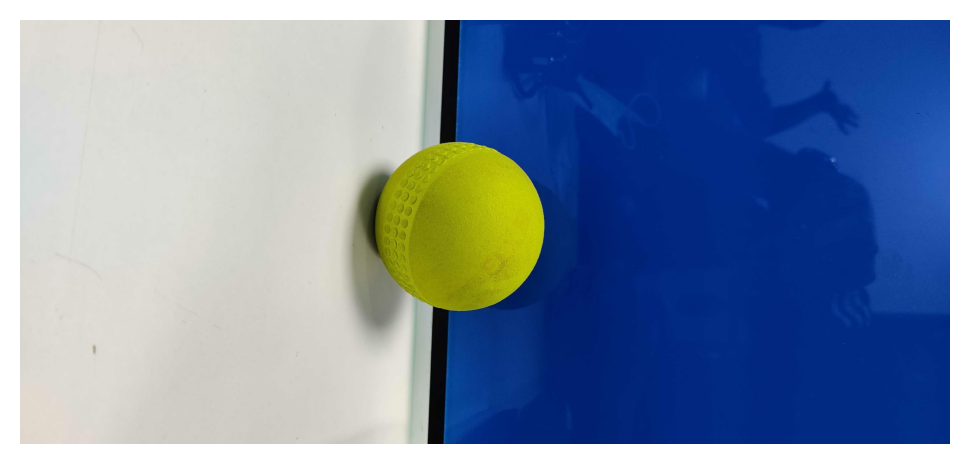

In [87]:
# Visualise the rgb image of ball

plt.figure(figsize=(6,4),dpi=200)
plt.imshow(ball_rgb)
plt.axis('off')
plt.show()

In [88]:
# Lets try the HSV colorspace and see how each channel looks like

rgb2hsv = cv2.cvtColor(ball_rgb, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(6,4),dpi=200)

plt.subplot(1,4,1)
plt.imshow(rgb2hsv)
plt.axis('off')
plt.title("HSV")

plt.subplot(1,4,2)
plt.imshow(rgb2hsv[:,:,0])
plt.axis('off')
plt.title("H")

plt.subplot(1,4,3)
plt.imshow(rgb2hsv[:,:,1])
plt.axis('off')
plt.title("S")

plt.subplot(1,4,4)
plt.imshow(rgb2hsv[:,:,2])
plt.axis('off')
plt.title("V")

plt.show()

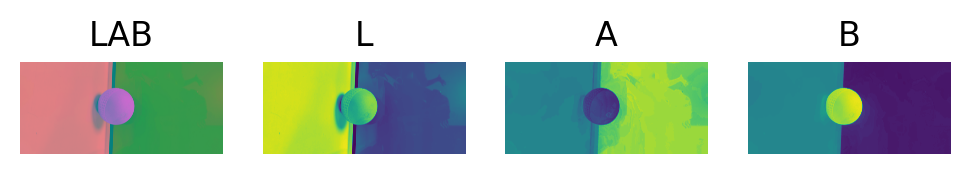

In [89]:
# Lets try finding a colorspace which can help us isolate the ball from its background

rgb2lab = cv2.cvtColor(ball_rgb, cv2.COLOR_RGB2LAB)

plt.figure(figsize=(6,4),dpi=200)

plt.subplot(1,4,1)
plt.imshow(rgb2lab)
plt.axis('off')
plt.title("LAB")

plt.subplot(1,4,2)
plt.imshow(rgb2lab[:,:,0])
plt.axis('off')
plt.title("L")

plt.subplot(1,4,3)
plt.imshow(rgb2lab[:,:,1])
plt.axis('off')
plt.title("A")

plt.subplot(1,4,4)
plt.imshow(rgb2lab[:,:,2])
plt.axis('off')
plt.title("B")


plt.show()

We see that B channel of LAB colorspace highlights only the ball. This can be a good representation to isolate only the ball

In [90]:
# Visualize the B channel in grayscale 

gray_ball = rgb2lab[:,:,2]
plt.figure(figsize=(6,4),dpi=200)
plt.imshow(gray_ball, cmap="gray")
plt.axis('off')
plt.show()

This gives a clear indication that the ball can be seperated from the background, Ideally we would like to have a binary image of 0 and 1. 
So we use the threshold function to color ball as white and remaining region as black 

In [91]:
help(cv2.threshold)

Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst]) -> retval, dst
    .   @brief Applies a fixed-level threshold to each array element.
    .   
    .   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
    .   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
    .   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
    .   values. There are several types of thresholding supported by the function. They are determined by
    .   type parameter.
    .   
    .   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
    .   above values. In these cases, the function determines the optimal threshold value using the Otsu's
    .   or Triangle algorithm and uses it instead of the specified thresh.
    .   
    .   @note Currently, the Otsu's and Triangle methods a

In [93]:
ret, mask = cv2.threshold(gray_ball, 150, 255, cv2.THRESH_BINARY)

# We use the bitwise NOT operation to create an inverse of the mask
mask_inv = cv2.bitwise_not(mask)
mask_inv = mask_inv.astype(np.uint8)

plt.figure(figsize=(6,4),dpi=200)
plt.imshow(mask, cmap="gray")
plt.axis('off')
plt.show()


The function of bitwise operators is mentioned in the help cells. We will use the bitwise_and function to extract only the region interested regardless of shape of region

In [94]:
help(cv2.bitwise_and)

Help on built-in function bitwise_and:

bitwise_and(...)
    bitwise_and(src1, src2[, dst[, mask]]) -> dst
    .   @brief computes bitwise conjunction of the two arrays (dst = src1 & src2)
    .   Calculates the per-element bit-wise conjunction of two arrays or an
    .   array and a scalar.
    .   
    .   The function cv::bitwise_and calculates the per-element bit-wise logical conjunction for:
    .   *   Two arrays when src1 and src2 have the same size:
    .       \f[\texttt{dst} (I) =  \texttt{src1} (I)  \wedge \texttt{src2} (I) \quad \texttt{if mask} (I) \ne0\f]
    .   *   An array and a scalar when src2 is constructed from Scalar or has
    .       the same number of elements as `src1.channels()`:
    .       \f[\texttt{dst} (I) =  \texttt{src1} (I)  \wedge \texttt{src2} \quad \texttt{if mask} (I) \ne0\f]
    .   *   A scalar and an array when src1 is constructed from Scalar or has
    .       the same number of elements as `src2.channels()`:
    .       \f[\texttt{dst} (I) = 

(1824, 4000, 3) (1824, 4000, 3)


Text(0.5, 1.0, 'Background')

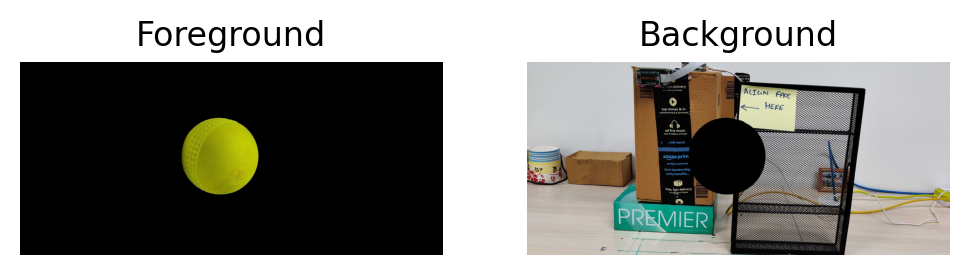

In [97]:

print(ball_rgb.shape, img_rgb.shape)
ball = cv2.bitwise_and(ball_rgb,ball_rgb,mask=mask)
bkgrnd = cv2.bitwise_and(img_rgb, img_rgb ,mask=mask_inv )

dst = cv2.add(ball,bkgrnd)
img_rgb = dst

plt.figure(figsize=(6,4),dpi=200)

plt.subplot(1,2,1)
plt.imshow(ball)
plt.axis('off')
plt.title("Foreground")

plt.subplot(1,2,2)
plt.imshow(bkgrnd)
plt.axis('off')
plt.title("Background")


In [99]:
dst = cv2.add(ball,bkgrnd)

plt.figure(figsize=(6,4),dpi=200)

plt.imshow(dst)
plt.axis('off')
plt.show()